In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

import openmm as mm
import openmm.app as app
import openmm.unit as unit
from mdtraj.reporters import HDF5Reporter

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
sequence = 'GCGCCATCGCG'
traj = mdna.sequence_to_md(sequence=sequence,time=10,temperature=298,time_unit='picoseconds')

Sequence: GCGCCATCGCG
Number of base pairs: 11
Initialize DNA openMM simulation at 310 K for 100 ps time units
Minimize energy
Run simulation for 50000 steps
Simulation completed
Saved trajectory as: ./GCGCCATCGCG.h5


In [3]:
rigid = mdna.NucleicFrames(traj)

In [4]:
rigid.mean_reference_frames.shape

(11, 500, 4, 3)

Text(0.5, -0.05, 'Base Pair (Index)')

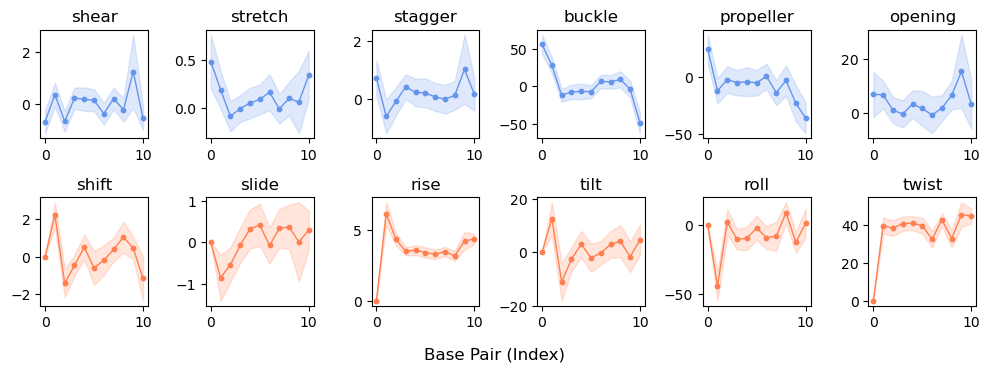

In [5]:
rigid = mdna.NucleicFrames(traj)
params, names = rigid.get_parameters()

fig, ax = mdna.plot_parameters(params,names)
fig.supxlabel('Base Pair (Index)',y=-0.05)    

Text(0.5, 0, 'Base Pair')

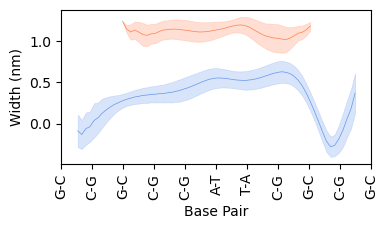

In [6]:
grooves = mdna.GrooveAnalysis(traj)
fig, ax = plt.subplots(figsize=[4,2])
grooves.plot_groove_widths(ax=ax)
ax.set_ylabel('Width (nm)')
ax.set_xlabel('Base Pair')

10 10 10 10
(500, 10) (500, 10)


Text(0.5, 0, 'Base Step Index')

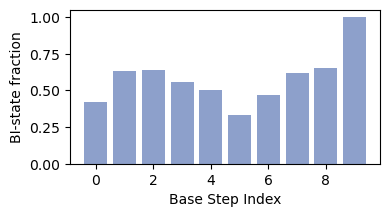

In [7]:
import seaborn as sns
torsions = mdna.TorsionAnalysis(traj)
b_state = torsions.B_state 
fig, ax = plt.subplots(figsize=[4,2])
ax.bar(range(len(b_state)),b_state, color=sns.color_palette('Set2')[2])
ax.set_ylabel('BI-state fraction')
ax.set_xlabel('Base Step Index')